<a href="https://colab.research.google.com/github/RadhitaPasha/PRAKTIKUM-1-8-STRUKTUR-DATA_G.231.22.0121/blob/main/Graph_G.231.22.0121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

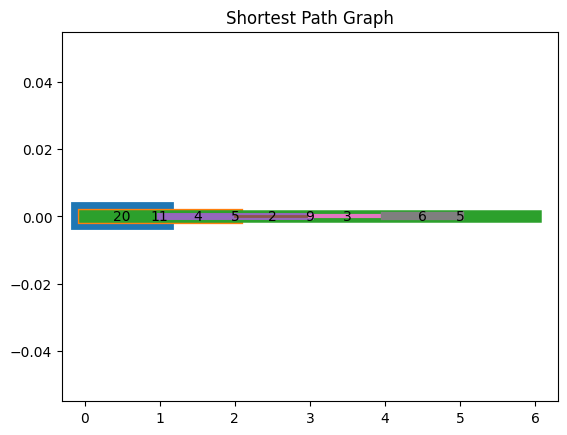

In [3]:
import graphlib
import matplotlib.pyplot as plt
# Membuat class untuk graph visualization
class Graph:
    def __init__(self):
        self.edges = {}

    def add_edge(self, source, destination, weight):
        # Tambahkan edge ke dalam graph
        if source not in self.edges:
            self.edges[source] = []
        self.edges[source].append((destination, weight))

    def shortest_path(self, source, destination):
        distances = {}
        visited = set()

        # Inisialisasi jarak dari source ke setiap node dengan nilai tak terhingga
        for node in self.edges:
            distances[node] = float('inf')

        # Jarak dari source ke source adalah 0
        distances[source] = 0
        # Priority queue untuk menyimpan node yang akan dieksplorasi
        queue = [(0, source)]


        while queue:
            distance, node = Graph.heappop(queue)

            # Jika node sudah merupakan tujuan, kembalikan jarak ke tujuan
            if node == destination:
                return distances[destination]

            # Jika node sudah dikunjungi, lanjut ke iterasi berikutnya
            if node in visited:
                continue

            visited.add(node)

            # Iterasi melalui tetangga-tetangga node
            for neighbor, weight in self.edges[node]:
                if neighbor not in visited:
                    new_distance = distance + weight
                    # Update jarak terpendek jika ditemukan jarak yang lebih pendek
                    if new_distance < distances[neighbor]:
                        distances[neighbor] = new_distance
                        graphlib.heappush(queue, (new_distance, neighbor))

        return distances[destination]

    def draw(self):
        # Visualisasi graph menggunakan matplotlib
        fig, ax = plt.subplots()

        for node in self.edges:
            for neighbor, weight in self.edges[node]:
                ax.plot([node, neighbor], [0, 0], linewidth=weight)
                ax.text((node + neighbor) / 2, 0, str(weight), ha='center', va='center')

        ax.set_title('Shortest Path Graph')
        plt.show()

# Contoh penggunaan:

graph = Graph()

# Menambahkan edge-edge ke dalam graf
graph.add_edge(0, 1, 20)
graph.add_edge(0, 2, 11)
graph.add_edge(0, 6, 9)
graph.add_edge(1, 2, 4)
graph.add_edge(1, 3, 5)
graph.add_edge(2, 3, 2)
graph.add_edge(3, 4, 3)
graph.add_edge(4, 5, 6)
graph.add_edge(5, 5, 5)

# Menampilkan visualisasi graf
graph.draw()
